In [91]:
from sklearn.model_selection import train_test_split
import pickle
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from keras.layers import Dense, Dropout

from matplotlib import pyplot



In [92]:
fdctory='D:\\Shaopeng on machine learning\\Kaggle_Shubo\Data\\fMRI_competition'
os.chdir(fdctory)

with open('features_512.pk', 'rb') as f:
    x = pickle.load(f)

with open('y_train.pk', 'rb') as f:
    y = pickle.load(f)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
    x, y, test_size = 0.3, random_state = 42
)

val_x, val_x, evl_y, evl_y = train_test_split(
    x, y, test_size = 0.3, random_state = 42
)

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(train_x)
y = sc_y.fit_transform(train_y)
X_test = sc_X.fit_transform(test_x)
y_test = sc_y.fit_transform(test_y)

loading=pd.read_csv('loading.csv')
fnc=pd.read_csv('fnc.csv')
ICN_num=pd.read_csv('ICN_numbers.csv')
ID_site2=pd.read_csv('reveal_ID_site2.csv')
train_scores=pd.read_csv('train_scores.csv')

In [93]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,4.103895,5.684214,2.098208,5.188046,4.038535,3.485445,3.382099,3.261429,3.348547,1.923593,...,2.229850,3.539399,1.684418,3.971759,4.787309,1.433919,1.732534,6.348838,0.855678,2.343616
1,3.733469,4.477904,1.851237,5.475603,4.797605,4.235373,4.382057,4.662331,3.165593,2.061907,...,2.485954,3.900663,1.485026,3.884533,4.642402,2.587695,2.000875,5.264329,1.099525,2.930105
2,3.778871,4.935719,1.670830,5.801820,5.353310,4.705373,5.274077,5.290926,3.188184,2.509456,...,3.402400,4.003388,0.968776,4.556301,5.557565,3.193635,2.397074,5.281394,2.376009,3.388042
3,3.682853,5.343725,2.131504,5.638901,4.978138,4.145651,3.864457,4.206456,2.884188,2.390324,...,2.289896,3.722303,1.535737,3.410061,4.768682,2.328695,1.978705,6.043396,1.499768,2.847468
4,3.440170,5.086637,1.915383,5.220218,4.551360,4.330769,3.996255,4.222156,3.418201,1.958005,...,2.871852,4.008320,1.293915,3.958404,5.529665,2.215153,2.285054,5.542633,1.186254,3.023549


In [94]:
fnc.head()

,Id,SCN(53)_vs_SCN(69),SCN(98)_vs_SCN(69),SCN(99)_vs_SCN(69),SCN(45)_vs_SCN(69),ADN(21)_vs_SCN(69),ADN(56)_vs_SCN(69),SMN(3)_vs_SCN(69),SMN(9)_vs_SCN(69),SMN(2)_vs_SCN(69),...,CBN(13)_vs_DMN(94),CBN(18)_vs_DMN(94),CBN(4)_vs_DMN(94),CBN(7)_vs_DMN(94),CBN(18)_vs_CBN(13),CBN(4)_vs_CBN(13),CBN(7)_vs_CBN(13),CBN(4)_vs_CBN(18),CBN(7)_vs_CBN(18),CBN(7)_vs_CBN(4)
0,10001,0.368580,0.166876,0.438148,0.341007,-0.186251,0.049096,0.121417,-0.174268,-0.231578,...,-0.149279,0.552841,0.131046,0.335446,0.394867,-0.042853,0.124627,-0.060712,0.515964,0.290488
1,10002,0.151696,-0.024819,0.217504,0.418072,-0.227234,-0.064052,-0.143832,-0.118116,-0.054825,...,-0.214216,-0.039792,0.143014,-0.189962,0.498373,0.444231,0.592438,0.028649,0.705524,0.248327
2,10003,0.343415,0.109974,0.741641,0.578558,-0.676446,-0.436960,-0.295663,-0.377790,-0.344963,...,-0.154941,0.136850,-0.022361,0.137625,0.677972,0.409412,0.563892,0.438684,0.618204,0.284474
3,10004,0.132793,0.258255,0.490769,0.342717,0.091112,0.107969,0.029220,-0.026237,0.094742,...,-0.130339,0.309540,0.141469,0.030853,0.344394,0.214097,0.317556,0.012435,0.665937,0.081358
4,10005,0.291921,0.251254,0.416470,0.511719,-0.362626,-0.164710,-0.289059,-0.015537,-0.087316,...,-0.139525,0.394932,0.040443,0.428334,0.498837,0.266755,0.227379,0.028984,0.752343,0.087898


In [95]:
loading.head()

,Id,IC_01,IC_07,IC_05,IC_16,IC_26,IC_06,IC_10,IC_09,IC_18,...,IC_08,IC_03,IC_21,IC_28,IC_11,IC_20,IC_30,IC_22,IC_29,IC_14
0,10001,0.006070,0.014466,0.004136,0.000658,-0.002742,0.005033,0.016720,0.003484,0.001797,...,0.018246,0.023711,0.009177,-0.013929,0.030696,0.010496,0.002892,-0.023235,0.022177,0.017192
1,10002,0.009087,0.009291,0.007049,-0.002076,-0.002227,0.004605,0.012277,0.002946,0.004086,...,0.014635,0.022556,0.012004,-0.011814,0.022479,0.005739,0.002880,-0.016609,0.025543,0.014524
2,10003,0.008151,0.014684,0.010444,-0.005293,-0.002913,0.015042,0.017745,0.003930,-0.008021,...,0.019565,0.030616,0.018184,-0.010469,0.029799,0.015435,0.005211,-0.028882,0.031427,0.018164
3,10004,0.004675,0.000957,0.006154,-0.000429,-0.001222,0.011755,0.013010,0.000193,0.008075,...,0.002658,0.022266,0.005956,-0.010595,0.024078,-0.000319,0.005866,-0.015182,0.024476,0.014760
4,10005,-0.000398,0.006878,0.009051,0.000369,0.000336,0.010679,0.010352,0.003637,0.004180,...,0.009702,0.017257,0.005454,-0.008591,0.019416,0.000786,0.002692,-0.019814,0.017105,0.013316


In [96]:
ICN_num.head()

,ICN_number
0,69
1,53
2,98
3,99
4,45


In [97]:
ID_site2.head()

,Id
0,10012
1,10014
2,10020
3,10034
4,10059


In [98]:
train_scores.head()

,Id,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2
0,10001,57.436077,30.571975,62.553736,53.325130,51.427998
1,10002,59.580851,50.969456,67.470628,60.651856,58.311361
2,10004,71.413018,53.152498,58.012103,52.418389,62.536641
3,10005,66.532630,NaN,NaN,52.108977,69.993075
4,10007,38.617381,49.197021,65.674285,40.151376,34.096421


In [99]:
from sklearn.impute import SimpleImputer
from numpy import nan
imp = SimpleImputer(missing_values=nan, strategy='mean')

In [100]:
columns=['Age','Domain1_val1','Domain1_va2','Domain2_val1','Domain2_val2']
columns

['Age', 'Domain1_val1', 'Domain1_va2', 'Domain2_val1', 'Domain2_val2']

In [101]:
transformed_values = imp.fit_transform(train_scores)
transformed_values1=pd.DataFrame(transformed_values, columns=['Id','Age','Domain1_val1','Domain1_va2','Domain2_val1','Domain2_val2'])
transformed_values1.head()



,Id,Age,Domain1_val1,Domain1_va2,Domain2_val1,Domain2_val2
0,10001.0,57.436077,30.571975,62.553736,53.325130,51.427998
1,10002.0,59.580851,50.969456,67.470628,60.651856,58.311361
2,10004.0,71.413018,53.152498,58.012103,52.418389,62.536641
3,10005.0,66.532630,51.474692,59.244132,52.108977,69.993075
4,10007.0,38.617381,49.197021,65.674285,40.151376,34.096421


In [103]:
loading.head()

,Id,IC_01,IC_07,IC_05,IC_16,IC_26,IC_06,IC_10,IC_09,IC_18,...,IC_08,IC_03,IC_21,IC_28,IC_11,IC_20,IC_30,IC_22,IC_29,IC_14
0,10001,0.006070,0.014466,0.004136,0.000658,-0.002742,0.005033,0.016720,0.003484,0.001797,...,0.018246,0.023711,0.009177,-0.013929,0.030696,0.010496,0.002892,-0.023235,0.022177,0.017192
1,10002,0.009087,0.009291,0.007049,-0.002076,-0.002227,0.004605,0.012277,0.002946,0.004086,...,0.014635,0.022556,0.012004,-0.011814,0.022479,0.005739,0.002880,-0.016609,0.025543,0.014524
2,10003,0.008151,0.014684,0.010444,-0.005293,-0.002913,0.015042,0.017745,0.003930,-0.008021,...,0.019565,0.030616,0.018184,-0.010469,0.029799,0.015435,0.005211,-0.028882,0.031427,0.018164
3,10004,0.004675,0.000957,0.006154,-0.000429,-0.001222,0.011755,0.013010,0.000193,0.008075,...,0.002658,0.022266,0.005956,-0.010595,0.024078,-0.000319,0.005866,-0.015182,0.024476,0.014760
4,10005,-0.000398,0.006878,0.009051,0.000369,0.000336,0.010679,0.010352,0.003637,0.004180,...,0.009702,0.017257,0.005454,-0.008591,0.019416,0.000786,0.002692,-0.019814,0.017105,0.013316


In [104]:
sc_loading = StandardScaler()
sc_fnc = StandardScaler()
loading1=loading.iloc[:,1:]
loading1 = sc_loading.fit_transform(loading1)
loading.iloc[:,1:]=loading1

In [105]:
loading.head()

,Id,IC_01,IC_07,IC_05,IC_16,IC_26,IC_06,IC_10,IC_09,IC_18,...,IC_08,IC_03,IC_21,IC_28,IC_11,IC_20,IC_30,IC_22,IC_29,IC_14
0,10001,0.142062,1.255860,-1.800899,-0.110295,-0.553337,-2.077450,0.760863,0.467375,-0.614859,...,2.097480,0.802459,-0.125210,-1.789838,1.590913,1.463663,-0.246917,-1.424320,-1.100899,0.269423
1,10002,0.804904,0.009732,-0.993733,-0.871768,-0.359809,-2.183602,-0.377087,0.299186,-0.182571,...,1.174941,0.476319,0.488228,-1.142483,-0.203899,0.177168,-0.251203,-0.314742,-0.267403,-0.445688
2,10003,0.599321,1.308355,-0.052862,-1.767802,-0.617709,0.404866,1.023389,0.606809,-2.468915,...,2.434458,2.752236,1.829101,-0.730808,1.394985,2.799491,0.567749,-2.369957,1.189607,0.529951
3,10004,-0.164323,-1.997248,-1.241608,-0.413168,0.018330,-0.410371,-0.189350,-0.561193,0.570624,...,-1.885070,0.394432,-0.823940,-0.769374,0.145365,-1.461421,0.797836,-0.075779,-0.531615,-0.382432
4,10005,-1.278926,-0.571276,-0.438932,-0.191001,0.604573,-0.677238,-0.870123,0.515385,-0.164914,...,-0.085214,-1.019969,-0.932858,-0.155902,-0.872940,-1.162611,-0.317429,-0.851446,-2.356839,-0.769471


In [106]:
sc_fnc = StandardScaler()
fnc1=fnc.iloc[:,1:]
fnc1 = sc_fnc.fit_transform(fnc1)
fnc.iloc[:,1:]=fnc1

In [109]:
df2= pd.merge(loading, fnc, on='Id')
df2.head()

,Id,IC_01,IC_07,IC_05,IC_16,IC_26,IC_06,IC_10,IC_09,IC_18,...,CBN(13)_vs_DMN(94),CBN(18)_vs_DMN(94),CBN(4)_vs_DMN(94),CBN(7)_vs_DMN(94),CBN(18)_vs_CBN(13),CBN(4)_vs_CBN(13),CBN(7)_vs_CBN(13),CBN(4)_vs_CBN(18),CBN(7)_vs_CBN(18),CBN(7)_vs_CBN(4)
0,10001,0.142062,1.255860,-1.800899,-0.110295,-0.553337,-2.077450,0.760863,0.467375,-0.614859,...,-0.367106,1.276582,0.347779,0.494204,-0.380967,-2.145727,-1.170524,-1.015184,-0.784710,-0.047986
1,10002,0.804904,0.009732,-0.993733,-0.871768,-0.359809,-2.183602,-0.377087,0.299186,-0.182571,...,-0.710168,-2.029491,0.430029,-2.518197,0.148654,0.525164,0.893950,-0.569832,0.562237,-0.297973
2,10003,0.599321,1.308355,-0.052862,-1.767802,-0.617709,0.404866,1.023389,0.606809,-2.468915,...,-0.397016,-1.044071,-0.706524,-0.639991,1.067635,0.334236,0.767976,1.473681,-0.058224,-0.083648
3,10004,-0.164323,-1.997248,-1.241608,-0.413168,0.018330,-0.410371,-0.189350,-0.561193,0.570624,...,-0.267046,-0.080704,0.419408,-1.252164,-0.639229,-0.736760,-0.319116,-0.650637,0.280948,-1.287983
4,10005,-1.278926,-0.571276,-0.438932,-0.191001,0.604573,-0.677238,-0.870123,0.515385,-0.164914,...,-0.315572,0.395666,-0.274903,1.026770,0.151027,-0.448011,-0.717072,-0.568162,0.894916,-1.249201


In [110]:
df3 = pd.merge(df2, transformed_values1, on='Id')
df3.head()

,Id,IC_01,IC_07,IC_05,IC_16,IC_26,IC_06,IC_10,IC_09,IC_18,...,CBN(4)_vs_CBN(13),CBN(7)_vs_CBN(13),CBN(4)_vs_CBN(18),CBN(7)_vs_CBN(18),CBN(7)_vs_CBN(4),Age,Domain1_val1,Domain1_va2,Domain2_val1,Domain2_val2
0,10001,0.142062,1.255860,-1.800899,-0.110295,-0.553337,-2.077450,0.760863,0.467375,-0.614859,...,-2.145727,-1.170524,-1.015184,-0.784710,-0.047986,57.436077,30.571975,62.553736,53.325130,51.427998
1,10002,0.804904,0.009732,-0.993733,-0.871768,-0.359809,-2.183602,-0.377087,0.299186,-0.182571,...,0.525164,0.893950,-0.569832,0.562237,-0.297973,59.580851,50.969456,67.470628,60.651856,58.311361
2,10004,-0.164323,-1.997248,-1.241608,-0.413168,0.018330,-0.410371,-0.189350,-0.561193,0.570624,...,-0.736760,-0.319116,-0.650637,0.280948,-1.287983,71.413018,53.152498,58.012103,52.418389,62.536641
3,10005,-1.278926,-0.571276,-0.438932,-0.191001,0.604573,-0.677238,-0.870123,0.515385,-0.164914,...,-0.448011,-0.717072,-0.568162,0.894916,-1.249201,66.532630,51.474692,59.244132,52.108977,69.993075
4,10007,-0.050843,0.321306,0.422658,-0.549727,-0.370268,-0.494449,0.022719,-0.018563,-0.378084,...,0.038326,0.321303,0.089799,0.549128,-0.029492,38.617381,49.197021,65.674285,40.151376,34.096421


In [111]:
y_train_score=df3.iloc[:,-5:]
y_train_score
x_train_score=df3.iloc[:,1:-5]
x_train_score.head()


,IC_01,IC_07,IC_05,IC_16,IC_26,IC_06,IC_10,IC_09,IC_18,IC_04,...,CBN(13)_vs_DMN(94),CBN(18)_vs_DMN(94),CBN(4)_vs_DMN(94),CBN(7)_vs_DMN(94),CBN(18)_vs_CBN(13),CBN(4)_vs_CBN(13),CBN(7)_vs_CBN(13),CBN(4)_vs_CBN(18),CBN(7)_vs_CBN(18),CBN(7)_vs_CBN(4)
0,0.142062,1.255860,-1.800899,-0.110295,-0.553337,-2.077450,0.760863,0.467375,-0.614859,-0.164435,...,-0.367106,1.276582,0.347779,0.494204,-0.380967,-2.145727,-1.170524,-1.015184,-0.784710,-0.047986
1,0.804904,0.009732,-0.993733,-0.871768,-0.359809,-2.183602,-0.377087,0.299186,-0.182571,-0.522889,...,-0.710168,-2.029491,0.430029,-2.518197,0.148654,0.525164,0.893950,-0.569832,0.562237,-0.297973
2,-0.164323,-1.997248,-1.241608,-0.413168,0.018330,-0.410371,-0.189350,-0.561193,0.570624,-0.436785,...,-0.267046,-0.080704,0.419408,-1.252164,-0.639229,-0.736760,-0.319116,-0.650637,0.280948,-1.287983
3,-1.278926,-0.571276,-0.438932,-0.191001,0.604573,-0.677238,-0.870123,0.515385,-0.164914,-1.712995,...,-0.315572,0.395666,-0.274903,1.026770,0.151027,-0.448011,-0.717072,-0.568162,0.894916,-1.249201
4,-0.050843,0.321306,0.422658,-0.549727,-0.370268,-0.494449,0.022719,-0.018563,-0.378084,0.337021,...,-0.372065,0.473731,-0.057996,-0.525570,0.320951,0.038326,0.321303,0.089799,0.549128,-0.029492


In [112]:
x_train_score=x_train_score.to_numpy()
y_train_score=y_train_score.to_numpy()

In [113]:
train_score_x, test_score_x, train_score_y, test_score_y = train_test_split(
    x_train_score, y_train_score, test_size = 0.3, random_state = 42
)

In [114]:
test_score_y.shape


(1764, 5)

In [115]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor(n_neighbors=305)))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	level0.append(('Ridge', Ridge()))
	level0.append(('Lasso', Lasso()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor(n_neighbors=305)
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['Ridge'] = Ridge()
	models['Lasso'] = Lasso()
	models['stacking'] = get_stacking()
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model,train_score_x,y_ID,test_score_x, y_test_ID):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    NewModel = model.fit(train_score_x, y_ID)
    score_kaggle_train = NewModel.predict(train_score_x)
    score_kaggle_train_score=sum(abs((score_kaggle_train-y_ID)))/sum(y_ID)
    score_kaggle_test = NewModel.predict(test_score_x)
    score_kaggle_test_score=sum(abs((score_kaggle_test-y_test_ID)))/sum(y_test_ID)
    print('>Mean train %s Mean train_fit %s Mean test %s Mean test_fit %s' % (mean(y_ID), mean(score_kaggle_train),mean(y_test_ID),mean(score_kaggle_test)))
    print('>Std train %s Std train_fit %s Std test %s Std test_fit %s' % (std(y_ID), std(score_kaggle_train),std(y_test_ID),std(score_kaggle_test)))
    return score_kaggle_train_score, score_kaggle_test_score


In [116]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, results_eval, names = list(), list(), list()
#new_y_score_train = pd.DataFrame()
#new_y_score_test = pd.DataFrame()
for name, model in models.items():
    for ID in [0,1,2,3,4]:
        y_ID=train_score_y[:,ID]
        y_test_ID=test_score_y[:,ID]
        score_kaggle_train_score, score_kaggle_test_score = evaluate_model(model,train_score_x,y_ID,test_score_x, y_test_ID)
        results.append(score_kaggle_train_score)
        #new_y_score_train.append(score_kaggle_train_score)
        results_eval.append(score_kaggle_test_score)
        #new_y_score_test.append(score_kaggle_test_score)
        names.append(name)
        print('>%s Col ID is %s %.3f (%.3f)' % (name, ID,score_kaggle_train_score, score_kaggle_test_score))



>Mean train 50.28611027629148 Mean train_fit 49.27006006926674 Mean test 49.44639904756933 Mean test_fit 49.16512577239997
>Std train 13.619118077810342 Std train_fit 1.383846061393547 Std test 13.33091493324511 Std test_fit 1.3882443333161445
>knn Col ID is 0 0.209 (0.208)
>Mean train 51.512736408062544 Mean train_fit 51.37795941867196 Mean test 51.385986948702616 Mean test_fit 51.336627040042615
>Std train 9.749375260333318 Std train_fit 0.6631502340249414 Std test 9.917932920654055 Std test_fit 0.6603423762030561
>knn Col ID is 1 0.144 (0.150)
>Mean train 59.17748821827048 Mean train_fit 59.38884568921105 Mean test 59.399520516042344 Mean test_fit 59.366867517057514
>Std train 10.769567182186346 Std train_fit 0.514073238866092 Std test 11.370984864403864 Std test_fit 0.5052047043277399
>knn Col ID is 2 0.138 (0.145)
>Mean train 47.50867902908604 Mean train_fit 47.49473274857501 Mean test 46.897160629019716 Mean test_fit 47.46902101205481
>Std train 10.987555590923911 Std train_fit 0

In [117]:
results=pd.DataFrame(results)
results_eval=pd.DataFrame(results_eval)

In [118]:
K=results.loc[0:4,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('KNN Train score is %s' % (K))
K=results.loc[5:9,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Tree Train score is %s' % (K))
K=results.loc[10:14,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('SVM Train score is %s' % (K))
K=results.loc[15:19,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Ridge Train score is %s' % (K))
K=results.loc[20:24,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Lasso Train score is %s' % (K))
K=results.loc[25:29,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Stacking Train score is %s' % (K))


K=results_eval.loc[0:4,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('KNN Test score is %s' % (K))
K=results_eval.loc[5:9,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Tree Test score is %s' % (K))
K=results_eval.loc[10:14,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('SVM Test score is %s' % (K))
K=results_eval.loc[15:19,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Ridge Test score is %s' % (K))
K=results_eval.loc[20:24,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Lasso Test score is %s' % (K))
K=results_eval.loc[25:29,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Stacking Test score is %s' % (K))

KNN Train score is [0.17485822]
Tree Train score is [2.22811816e-18]
SVM Train score is [0.15513674]
Ridge Train score is [0.12280126]
Lasso Train score is [0.16083658]
Stacking Train score is [0.14032002]
KNN Test score is [0.17824846]
Tree Test score is [0.23795044]
SVM Test score is [0.17167042]
Ridge Test score is [0.1891365]
Lasso Test score is [0.16499496]
Stacking Test score is [0.16003903]


In [119]:
train_result=results.values.tolist()
test_result=results_eval.values.tolist()
type(train_result)

list

{'whiskers': [<matplotlib.lines.Line2D at 0x29d0f6b25f8>,
 'caps': [<matplotlib.lines.Line2D at 0x29d0f6a1e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x29d0f6b2eb8>,
 'medians': [<matplotlib.lines.Line2D at 0x29d0f6bc550>,
 'fliers': [<matplotlib.lines.Line2D at 0x29d0f6bc860>,
 'means': []}

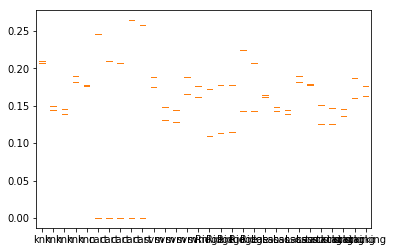

In [120]:
pyplot.boxplot(train_result,labels=names,sym="o")
pyplot.boxplot(test_result,labels=names,sym="s")